In [1]:
# importing general libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns

In [2]:
# Loading the dataset

data = pd.read_excel('/content/Data_Train.xlsx')
pd.set_option('display.max_columns', None)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
#Check for missing value 
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
#Imputing null values 
data.dropna(inplace=True)
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Feature Engineering 

In [6]:
# Extracting day, month and year from date column 

data['Travel_Day'] = pd.to_datetime(data.Date_of_Journey, format= "%d/%m/%Y").dt.day
data['Travel_Month'] = pd.to_datetime(data.Date_of_Journey, format= "%d/%m/%Y").dt.month
data['Travel_Year'] = pd.to_datetime(data.Date_of_Journey, format= "%d/%m/%Y").dt.year

#Now we drop the Date_Of_Journey as it is no longer needed.
data.drop(["Date_of_Journey"], axis=1, inplace=True)

In [7]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
data['Dep_Hour'] = pd.to_datetime(data.Dep_Time).dt.hour

#Extracting Minute 
data['Dep_Min'] = pd.to_datetime(data.Dep_Time).dt.minute

#Droping Dep_Time col
data.drop(["Dep_Time"], axis = 1, inplace= True)
#data.head()

In [8]:
# Arrival time is when a plane leaves the gate. 

# Extracting Hours
data['Arr_Hour'] = pd.to_datetime(data.Arrival_Time).dt.hour

#Extracting Minute 
data['Arr_Min'] = pd.to_datetime(data.Arrival_Time).dt.minute

#Droping Dep_Time col
data.drop(["Arrival_Time"], axis = 1, inplace= True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Travel_Day,Travel_Month,Travel_Year,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [9]:
# Making duration col to one format 

duration = list(data["Duration"])

for i in range(len(duration)):
  if len(duration[i].split()) != 2:
    if "h" in duration[i]:
      duration[i] = duration[i].strip() + " 0m"
    else :
      duration[i] = "0h " + duration[i]


In [10]:
# We prepare seperate hour and min for duration

Duration_Hours = []
Duration_Min = [] 
for i in range(len(duration)):
  Duration_Hours.append(int(duration[i].split(sep="h")[0]))
  Duration_Min.append(int(duration[i].split(sep="m")[0].split()[-1]))

data['Duration_Hours'] = Duration_Hours
data['Duration_Min'] = Duration_Min

data.drop(["Duration"], axis = 1, inplace = True)

In [11]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Travel_Day,Travel_Month,Travel_Year,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_Hours,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [12]:
# Airline value counts

data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [13]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = data[["Airline"]]
Current_Airline_List = Airline['Airline']
New_Airline_List = []

for carrier in Current_Airline_List:
  if carrier in ['Jet Airways', 'IndiGo', 'Air India', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia']:
    New_Airline_List.append(carrier)
  else:
    New_Airline_List.append('Other')

Airline['Airline'] = pd.DataFrame(New_Airline_List)
Airline['Airline'].value_counts()

<ipython-input-13-7b3cca2c5193>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline'] = pd.DataFrame(New_Airline_List)


Jet Airways          3849
IndiGo               2053
Air India            1750
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Other                  23
Name: Airline, dtype: int64

In [14]:
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [15]:
# Feature engineering on: Source
data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [16]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = data[["Source"]]
Source = pd.get_dummies(Source, drop_first=True) 
# drop_first= True means we drop the first column to prevent multicollinearity
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [17]:
# Feature engineering on: Destination
data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [18]:
# Renaming destination 'New Delhi' to 'Delhi' - to match with Source
Destination = data[["Destination"]]
Current_Destination_List = Destination['Destination']
New_Destination_List = []

for value in Current_Destination_List:
  if value in ['New Delhi']:
    New_Destination_List.append('Delhi')
  else:
    New_Destination_List.append(value)

Destination['Destination'] = pd.DataFrame(New_Destination_List)

# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

<ipython-input-18-f347f67066fa>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Destination['Destination'] = pd.DataFrame(New_Destination_List)


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [19]:
# Dropping Route and Additional Info

data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [20]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [21]:
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Travel_Day,Travel_Month,Travel_Year,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_Hours,Duration_Min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [22]:
data_train = pd.concat([data, Airline, Source, Destination], axis = 1) # axis = 1 signifies column
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_train.head()

,Total_Stops,Price,Travel_Day,Travel_Month,Travel_Year,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_Hours,Duration_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


Feature Selection

In [23]:
X = data_train.loc[:, ['Total_Stops', 'Travel_Day', 'Travel_Month', 'Dep_Hour',
       'Dep_Min', 'Arr_Hour', 'Arr_Min', 'Duration_Hours',
       'Duration_Min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
y = data_train.iloc[:, 1]
print(X.shape, y.shape)

(10682, 25) (10682,)


Feature Importance

In [24]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

print(selection.feature_importances_)

[0.24041349 0.1381082  0.06865515 0.02930442 0.02705686 0.03533388
 0.02656664 0.15108852 0.02162789 0.00768706 0.0020626  0.01042752
 0.10294762 0.01507081 0.02353509 0.00375093 0.00525489 0.0008879
 0.01939957 0.01241348 0.01731761 0.00797316 0.02688459 0.00373517
 0.00249696]


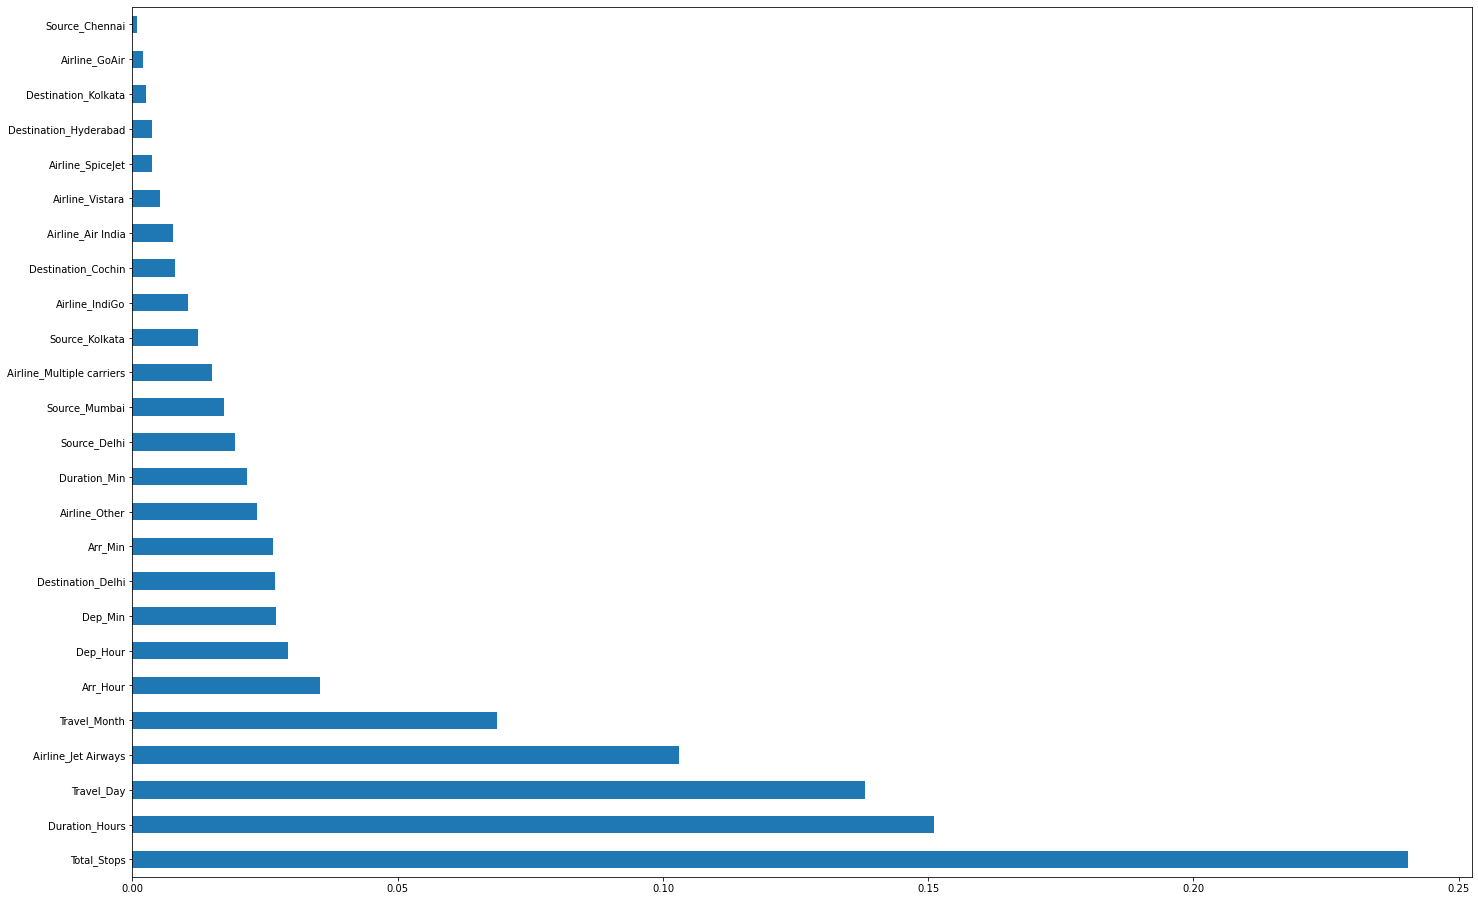

In [25]:
# Plotting Graph for better Visualization

plt.figure(figsize = (24,16))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [26]:
# Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    # Calculating Variable Inflation Factor (VIF)
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [27]:
# Compute VIF on X
calc_vif(X)

,variables,VIF
0,Total_Stops,7.483614
1,Travel_Day,3.509757
2,Travel_Month,16.058719
3,Dep_Hour,5.755551
4,Dep_Min,2.777481
5,Arr_Hour,4.887929
6,Arr_Min,3.429245
7,Duration_Hours,6.085587
8,Duration_Min,4.067779
9,Airline_Air India,5.004881


In [28]:
X = data_train.loc[:, ['Total_Stops', 'Travel_Day', 'Travel_Month', 'Travel_Year', 'Dep_Hour',
       'Dep_Min', 'Arr_Hour', 'Arr_Min', 'Duration_Hours',
       'Duration_Min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]

X.head()

,Total_Stops,Travel_Day,Travel_Month,Travel_Year,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_Hours,Duration_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,2,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,1,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Model Training 

In [29]:
#split training and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [30]:
# Model Training 
from sklearn.ensemble import RandomForestRegressor
rfReg = RandomForestRegressor()
rfReg.fit(X_train, y_train)

print('Model Performance on Training set : ', round(rfReg.score(X_train, y_train)*100, 2) )
print('Model Performance on Test set : ', round(rfReg.score(X_test, y_test)*100, 2) )

Model Performance on Training set :  95.31
Model Performance on Test set :  76.07


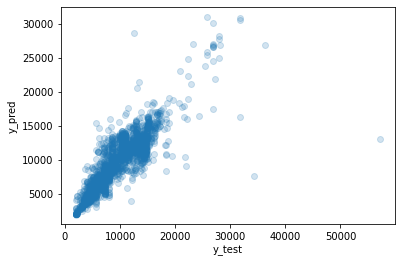

In [31]:
#plotting the performance on graph
y_pred = rfReg.predict(X_test)
plt.scatter(y_test, y_pred, alpha = 0.2)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [33]:
#Model Error Values 

print('MAE :', sklearn.metrics.mean_absolute_error(y_test, y_pred))
print('MSE :', sklearn.metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))
print('Normalized RMSE ', round(np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)),2))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

MAE : 1309.6793890344954
MSE : 5159986.364251291
RMSE : 2271.5603369162995
Normalized RMSE  0.04
Max Value:  79512 
Min Value:  1759


In [35]:
# Save model pkl back to project folder
import pickle
# open a file, where you ant to store the data
file = open('model.pkl', 'wb')
# dump information to that file
pickle.dump(rfReg, file)